In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Question 1

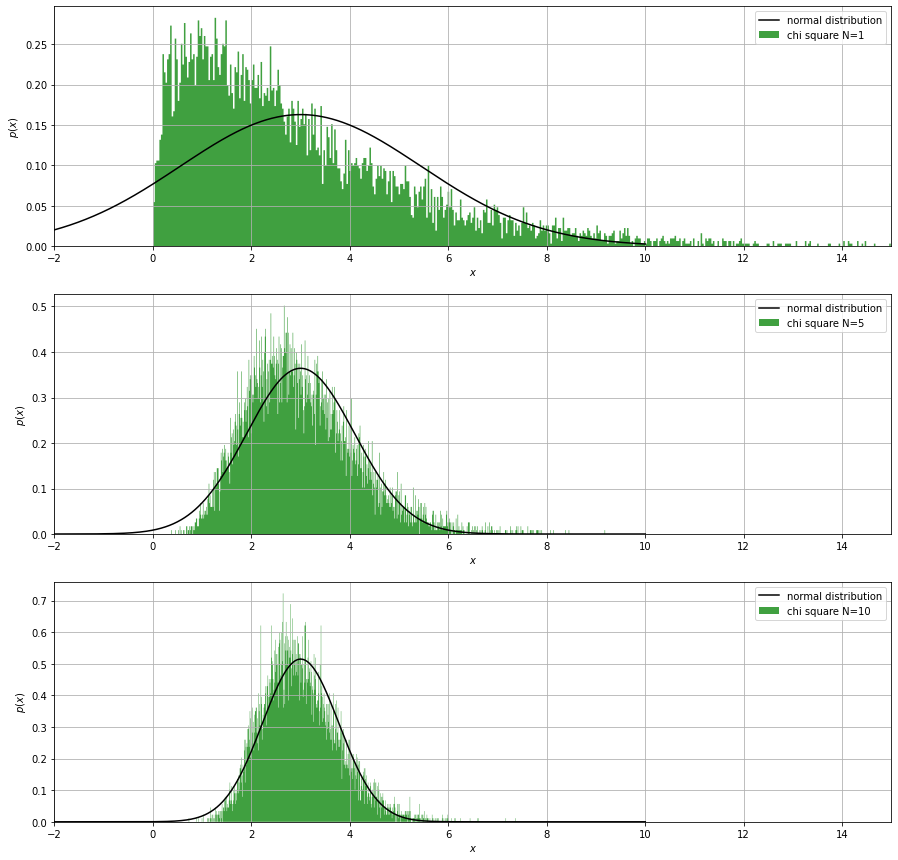

In [2]:
N = [1, 5, 10]

fig = plt.figure(figsize=(15,15))

# for loop to plot 3 graphs
for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)
    x = np.random.chisquare(3, (N[i], int(1e4)))

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=750, color='green', histtype='stepfilled', label='chi square N=%d' % (N[i]), density=True, alpha=0.75)
    
    # mu and sigma
    mu = 3
    sigma = np.sqrt(6/N[i])

    # plotting gaussian pdf
    dist = stats.norm(mu, sigma)
    pdf_x = np.linspace(-10, 10, 2000)
    ax.plot(pdf_x, dist.pdf(pdf_x), color='black', label='normal distribution')

    ax.set_xlim(-2, 15)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    ax.legend()
    ax.grid()

plt.show()

## Question 2

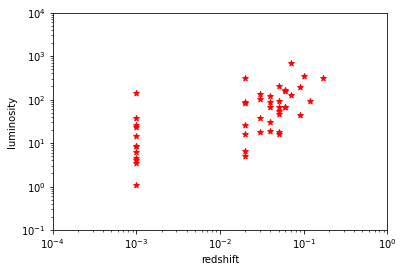

pearson coefficient:  0.5144497852670243
spearman coefficient:  0.6596325957535454
kendall tau coefficient:  0.5029584682704178
p-value for spearman:  6.166489759081011e-07
p-value for kendall tau:  2.969686227473415e-06


In [3]:
#loading the data from downloaded file
data = np.loadtxt('test.dat')    

# extracting luminosity data
Lx = data[:, 0]   
# extracting redshift data
z = data[:, 1]    

# plot
plt.xscale('log')
plt.yscale('log')
# scatter plot
plt.scatter(z, Lx, color='red', marker='*')
plt.xlim(10e-5, 1)
plt.ylim(10e-2, 10e3)
plt.xlabel('redshift')
plt.ylabel('luminosity')
plt.show()

# finding different coefficients
corr_coeff, p_val = stats.pearsonr(z, Lx)
rho, p_val2 = stats.spearmanr(z,Lx)
tau, p_val3 = stats.kendalltau(z, Lx)

# prints coeffiecients
print('pearson coefficient: ', corr_coeff)
print('spearman coefficient: ', rho)
print('kendall tau coefficient: ', tau)

# prints p-values
print('p-value for spearman: ', p_val2)
print('p-value for kendall tau: ', p_val3)

<p>The above values verify that the datasets have low positive correlation </p>

## Question 3

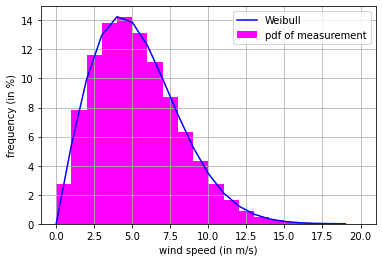

In [4]:
# frequency in %
y = np.array([2.75, 7.80, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 4.30, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.00])

# class interval
x1 = np.arange(0,20,1)    

# parameters shown from website
k1, mu1, lambda1 = 2.0, 0.0, 6.0   

# best-fit Weibull distribution
dist = stats.weibull_min(k1, mu1, lambda1)   

# plot
plt.plot(x1, 100*dist.pdf(x1), label='Weibull', color='blue')
plt.bar(x1, height=y, width=1, color='magenta', align='edge', label='pdf of measurement')
plt.xlabel('wind speed (in m/s)')
plt.ylabel('frequency (in %)')
plt.grid()
plt.legend()
plt.show()

## Question 4

In [5]:
# Gaussian distribution of mean = 0 and standard deviation = 1
gaussian = stats.norm(0, 1)   

# 1000 random draws from above distribution
norm1 = gaussian.rvs(1000)   
norm2 = gaussian.rvs(1000)

# pearson coefficient and p-value
corr_coeff, p_value = stats.pearsonr(norm1, norm2)

t_val = corr_coeff * np.sqrt((1000-2)/(1 - corr_coeff**2))

print('pearson coefficient: ', corr_coeff)
print('p-value (Pearson): ', p_value)

# p-value calculation from student-t distribution
if (t_val > 0): 
    p_value_student_t = 2 * (1-stats.t.cdf(t_val, 1000-2))
else:
    p_value_student_t = 2 * (stats.t.cdf(t_val, 1000-2))

print('p-value from student-t distribution: ', p_value_student_t)

pearson coefficient:  0.026005763833334767
p-value (Pearson):  0.41137016048522573
p-value from student-t distribution:  0.41137016048521424


<p>p-value agrees with that calculated from student-t distribution</p>